In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk import corpus
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import wsd
from nltk.corpus import wordnet as wn

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
'cp' is not recognized as an internal or externa

In [2]:
import pandas as pd

blog_df = pd.read_csv(r'C:\Users\thano\Downloads\archive (3)\Medium Blog Data.csv')
ratings_df = pd.read_csv(r'C:\Users\thano\Downloads\archive (3)\Blog Ratings.csv')
author_df = pd.read_csv(r'C:\Users\thano\Downloads\archive (3)\Author Data.csv')



In [3]:
print(blog_df.head())
print(ratings_df.head())
print(author_df.head())


   blog_id  author_id                                         blog_title  \
0        1          4           Let’s Dominate The Launchpad Space Again   
1        3          4           Let’s Dominate The Launchpad Space Again   
2        4          7                    Using ChatGPT for User Research   
3        5          8  The Automated Stable-Diffusion Checkpoint Merg...   
4        6          9  The Art of Lazy Creativity: My Experience Co-W...   

                                        blog_content  \
0  Hello, fam! If you’ve been with us since 2021,...   
1  Hello, fam! If you’ve been with us since 2021,...   
2  Applying AI to 4 common user research activiti...   
3  Checkpoint merging is powerful. The power of c...   
4  I was feeling particularly lazy one day and co...   

                                           blog_link  \
0  https://medium.com/@seedifyfund/lets-dominate-...   
1  https://medium.com/@seedifyfund/lets-dominate-...   
2  https://medium.com/ux-planet/using-

In [4]:
blog_df['topic'].value_counts()

topic
ai                      736
blockchain              644
cybersecurity           642
web-development         635
data-analysis           594
cloud-computing         589
security                527
web3                    471
machine-learning        467
nlp                     453
data-science            444
deep-learning           430
android                 426
dev-ops                 384
information-security    374
image-processing        354
flutter                 343
backend                 341
cloud-services          339
Cryptocurrency          331
app-development         322
backend-development     312
Software-Development    309
Name: count, dtype: int64

topic
ai                      736
blockchain              644
cybersecurity           642
web-development         635
data-analysis           594
cloud-computing         589
security                527
web3                    471
machine-learning        467
nlp                     453
data-science            444
deep-learning           430
android                 426
dev-ops                 384
information-security    374
image-processing        354
flutter                 343
backend                 341
cloud-services          339
Cryptocurrency          331
app-development         322
backend-development     312
Software-Development    309
Name: count, dtype: int64

In [5]:
blog_df.drop(['author_id','blog_link','blog_img','scrape_time'],axis='columns',inplace=True)

In [6]:
blog_df.drop_duplicates(['blog_title','blog_content'],inplace=True)

In [7]:
lst_stopwords=corpus.stopwords.words('english')
def pre_process_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text=str(text).lower()
    text=text.strip()
    text = re.sub(r'[^\w\s]', '', text)
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text=[word for word in lst_text if word not in lst_stopwords]
    if flg_lemm:
        lemmatizer = WordNetLemmatizer()
        lst_text = [lemmatizer.lemmatize(word) for word in lst_text]
    if flg_stemm:
        stemmer = PorterStemmer()
        lst_text = [stemmer.stem(word) for word in lst_text]
    text=" ".join(lst_text)
    return text

In [8]:
blog_df['clean_blog_content'] = blog_df['blog_content'].apply(lambda x: pre_process_text(x,flg_stemm=False,flg_lemm=True,lst_stopwords=lst_stopwords))

In [9]:
tfidf_vecotorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vecotorizer.fit_transform(blog_df['clean_blog_content'])
print(tfidf_matrix.shape)

(10466, 25167)
(10466, 25167)


In [10]:
cosine_sim = cosine_similarity(tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.02173711 0.         0.        ]
 [0.         1.         0.         ... 0.00452585 0.00905365 0.00985712]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02173711 0.00452585 0.         ... 1.         0.         0.        ]
 [0.         0.00905365 0.         ... 0.         1.         0.03097127]
 [0.         0.00985712 0.         ... 0.         0.03097127 1.        ]]
[[1.         0.         0.         ... 0.02173711 0.         0.        ]
 [0.         1.         0.         ... 0.00452585 0.00905365 0.00985712]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02173711 0.00452585 0.         ... 1.         0.         0.        ]
 [0.         0.00905365 0.         ... 0.         1.         0.03097127]
 [0.         0.00985712 0.         ... 0.         0.03097127 1.        ]]


In [11]:
# Let us have the blogs rated by user with user id 12
user_rating = ratings_df[ratings_df['userId']==12]

# consider blogs with ratings greater than or equal to 3.5 just for simplification
blogs_to_consider = user_rating[user_rating['ratings']>=3.5]['blog_id']

# Now we need Id's of this blogs in form of a list
high_rated_blogs = blogs_to_consider.values

In [12]:
rated_blogs = blog_df[blog_df['blog_id'].isin(high_rated_blogs)]
rated_blogs

,blog_id,blog_title,blog_content,topic,clean_blog_content
198,217,Stream Builder in Flutter,How to use StreamBuilder in Flutter? Flutter i...,flutter,use streambuilder flutter flutter popular open...
1301,1328,April 1st Recommendation on Alignment,"I want to make a basic assumption here, becaus...",ai,want make basic assumption date youre truly ra...
1377,1404,How ServiceNow users can use AI and what AI se...,ServiceNow is a cloud computing company that p...,ai,servicenow cloud computing company provides so...
3375,3402,Realtime Object detection using TensorFlow in ...,Real-time object detection using TensorFlow ca...,ai,realtime object detection using tensorflow ach...
3432,3459,2 ChatGPT (Free) Chrome Extensions so Useful T...,"Save hours on writing emails, googling, learni...",ai,save hour writing email googling learning unle...
8696,8723,Testing and Debugging in Flutter,Testing in Flutter: Testing is crucial for any...,flutter,testing flutter testing crucial app developmen...
8719,8746,Exploring Flutter Stream Builder: A Beginner’s...,"Hello there, little friend! Do you want to lea...",flutter,hello little friend want learn something calle...
8720,8747,Getting Started with Augmented Reality Mobile ...,A Comprehensive Guide to Learning and Building...,flutter,comprehensive guide learning building immersiv...
8722,8749,Mastering Bloc with ‘GetCubit’ in Flutter,"When you’re working with Flutter, you might wa...",flutter,youre working flutter might want manage state ...
8730,8757,Flutter State Management: An In-Depth Explorat...,Learn how to efficiently manage state in your ...,flutter,learn efficiently manage state flutter applica...


,blog_id,blog_title,blog_content,topic,clean_blog_content
198,217,Stream Builder in Flutter,How to use StreamBuilder in Flutter? Flutter i...,flutter,use streambuilder flutter flutter popular open...
1301,1328,April 1st Recommendation on Alignment,"I want to make a basic assumption here, becaus...",ai,want make basic assumption date youre truly ra...
1377,1404,How ServiceNow users can use AI and what AI se...,ServiceNow is a cloud computing company that p...,ai,servicenow cloud computing company provides so...
3375,3402,Realtime Object detection using TensorFlow in ...,Real-time object detection using TensorFlow ca...,ai,realtime object detection using tensorflow ach...
3432,3459,2 ChatGPT (Free) Chrome Extensions so Useful T...,"Save hours on writing emails, googling, learni...",ai,save hour writing email googling learning unle...
8696,8723,Testing and Debugging in Flutter,Testing in Flutter: Testing is crucial for any...,flutter,testing flutter testing crucial app developmen...
8719,8746,Exploring Flutter Stream Builder: A Beginner’s...,"Hello there, little friend! Do you want to lea...",flutter,hello little friend want learn something calle...
8720,8747,Getting Started with Augmented Reality Mobile ...,A Comprehensive Guide to Learning and Building...,flutter,comprehensive guide learning building immersiv...
8722,8749,Mastering Bloc with ‘GetCubit’ in Flutter,"When you’re working with Flutter, you might wa...",flutter,youre working flutter might want manage state ...
8730,8757,Flutter State Management: An In-Depth Explorat...,Learn how to efficiently manage state in your ...,flutter,learn efficiently manage state flutter applica...


In [13]:
def get_similar_blog(high_rated_blogs):
    """
        Args:
            high_rated_blogs : list of blog id's of the blogs rated by the user
        Returns:
            recommended_blogs : list of blog id's of the blogs that are to be recommended
    """

    recommended_blogs = []
    
    for blog_id in high_rated_blogs:
        
        # Find out the index value of particular blog
        temp_id = blog_df[blog_df['blog_id'] == blog_id].index.values[0]
        
        # Find out the index value of all the blogs which have similarity greater than 0.95
        temp_blog_id = blog_df[cosine_sim[temp_id] > 0.95]['blog_id'].index.values
        
        # Check whether the blog is already recommended or not and also verify that it is not seen by user previously
        for b_id in temp_blog_id:
            if b_id not in recommended_blogs and b_id not in high_rated_blogs:
                recommended_blogs.append(b_id)
                
    return recommended_blogs

In [14]:
recommended_blogs=get_similar_blog(high_rated_blogs)

In [15]:
blog_df.iloc[recommended_blogs]

,blog_id,blog_title,blog_content,topic,clean_blog_content
3377,3404,Here are the 3 ideas that you can use for Noti...,Leverage Notion using AI. — 3 ideas for Notio...,ai,leverage notion using ai 3 idea notionaiwwwins...
3434,3461,"Reading Herculaneum Scrolls: $250,000 Challeng...",Scientists have announced a contest with a pri...,ai,scientist announced contest prize quarter mill...
1379,1406,Unbabel — The AI-powered Translation Solution ...,"In today’s global economy, language barriers c...",ai,today global economy language barrier major ob...
1303,1330,"ChatGPT tweets, and it’s painful",OpenAI’s ChaptGPT engine has taken the world b...,ai,openais chaptgpt engine taken world storm beco...
8799,8826,10 Widgets Every Flutter Developer Must Master,A Comprehensive Guide to Flutter Widgets for B...,flutter,comprehensive guide flutter widget building am...
8907,8934,Data Persistence in Flutter,Data persistence is an essential aspect of any...,flutter,data persistence essential aspect mobile appli...
8698,8725,The Ultimate Flutter Navigator 2.0 series usin...,"In the first part, you learned about how you c...",flutter,first part learned set auto_route package flut...
8871,8898,Google Pay: A success story of Flutter,Google Pay is a popular digital wallet and onl...,flutter,google pay popular digital wallet online payme...
8836,8863,Flutter vs React Native: Which One is Better?,"When it comes to mobile app development, there...",flutter,come mobile app development two major player m...
200,219,Building beautiful product item widget in Flut...,Product item widgets are a fundamental aspect ...,flutter,product item widget fundamental aspect ecommer...


,blog_id,blog_title,blog_content,topic,clean_blog_content
3377,3404,Here are the 3 ideas that you can use for Noti...,Leverage Notion using AI. — 3 ideas for Notio...,ai,leverage notion using ai 3 idea notionaiwwwins...
3434,3461,"Reading Herculaneum Scrolls: $250,000 Challeng...",Scientists have announced a contest with a pri...,ai,scientist announced contest prize quarter mill...
1379,1406,Unbabel — The AI-powered Translation Solution ...,"In today’s global economy, language barriers c...",ai,today global economy language barrier major ob...
1303,1330,"ChatGPT tweets, and it’s painful",OpenAI’s ChaptGPT engine has taken the world b...,ai,openais chaptgpt engine taken world storm beco...
8799,8826,10 Widgets Every Flutter Developer Must Master,A Comprehensive Guide to Flutter Widgets for B...,flutter,comprehensive guide flutter widget building am...
8907,8934,Data Persistence in Flutter,Data persistence is an essential aspect of any...,flutter,data persistence essential aspect mobile appli...
8698,8725,The Ultimate Flutter Navigator 2.0 series usin...,"In the first part, you learned about how you c...",flutter,first part learned set auto_route package flut...
8871,8898,Google Pay: A success story of Flutter,Google Pay is a popular digital wallet and onl...,flutter,google pay popular digital wallet online payme...
8836,8863,Flutter vs React Native: Which One is Better?,"When it comes to mobile app development, there...",flutter,come mobile app development two major player m...
200,219,Building beautiful product item widget in Flut...,Product item widgets are a fundamental aspect ...,flutter,product item widget fundamental aspect ecommer...


In [16]:
pip install scikit-surprise


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Step 1: Load data
reader = Reader(rating_scale=(ratings_df['ratings'].min(), ratings_df['ratings'].max()))
data = Dataset.load_from_df(ratings_df[['userId', 'blog_id', 'ratings']], reader)

# Step 2: Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Build model (SVD is a matrix factorization algorithm)
model = SVD()
model.fit(trainset)

# Step 4: Predict
predictions = model.test(testset)


In [18]:
# Evaluation Metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


RMSE: 1.8281
MAE:  1.6279
Root Mean Squared Error (RMSE): 1.828072944857055
Mean Absolute Error (MAE): 1.6278982899655858
RMSE: 1.8281
MAE:  1.6279
Root Mean Squared Error (RMSE): 1.828072944857055
Mean Absolute Error (MAE): 1.6278982899655858


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

threshold = 4.0

y_true = [true_r for (_, _, true_r, _, _) in predictions]
y_pred = [pred_r >= threshold for (_, _, _, pred_r, _) in predictions]
y_true_label = [true_r >= threshold for true_r in y_true]

# Binary classification metrics
precision = precision_score(y_true_label, y_pred)
recall = recall_score(y_true_label, y_pred)
f1 = f1_score(y_true_label, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Precision: 0.3828
Recall:    0.0331
F1-Score:  0.0610
Precision: 0.3828
Recall:    0.0331
F1-Score:  0.0610


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


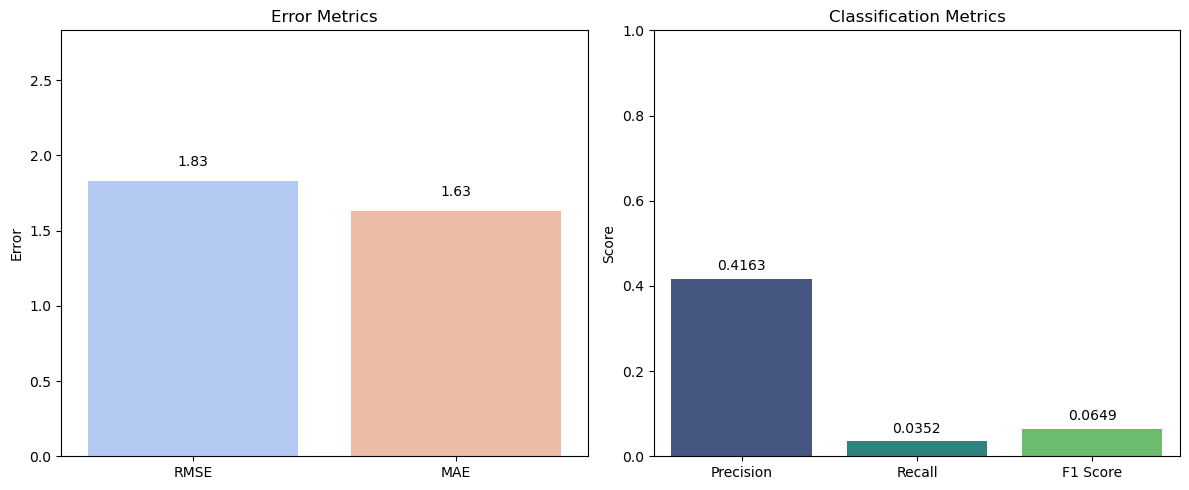

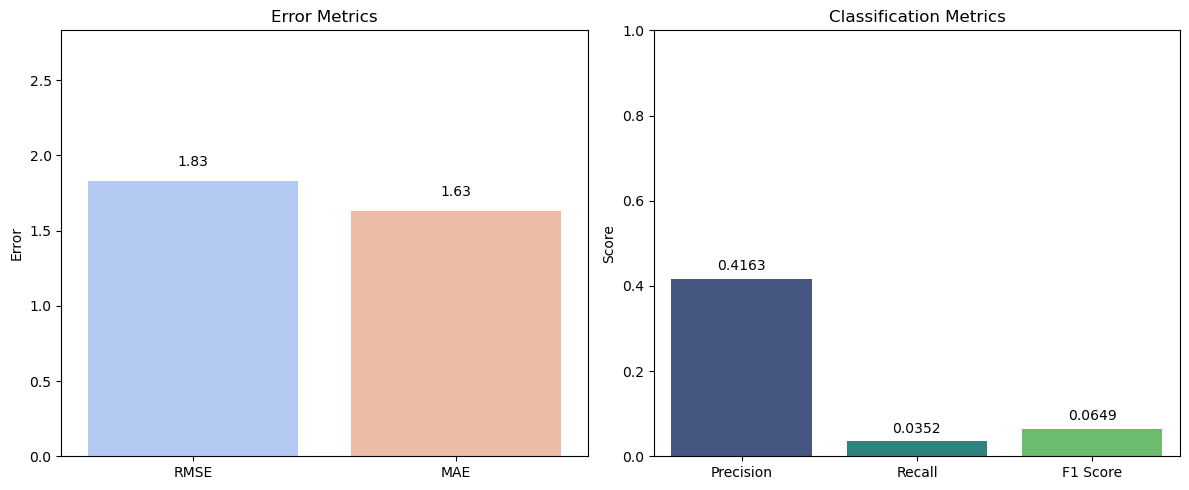

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics values
rmse = 1.83
mae = 1.63
precision = 0.4163
recall = 0.0352
f1 = 0.0649

# Plot RMSE and MAE (Error Metrics)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x=['RMSE', 'MAE'], y=[rmse, mae], palette='coolwarm')
plt.title('Error Metrics')
plt.ylim(0, max(rmse, mae) + 1)
plt.ylabel('Error')
for i, v in enumerate([rmse, mae]):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Plot Precision, Recall, F1 Score (Classification Metrics)
plt.subplot(1, 2, 2)
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[precision, recall, f1], palette='viridis')
plt.title('Classification Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
for i, v in enumerate([precision, recall, f1]):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()


C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


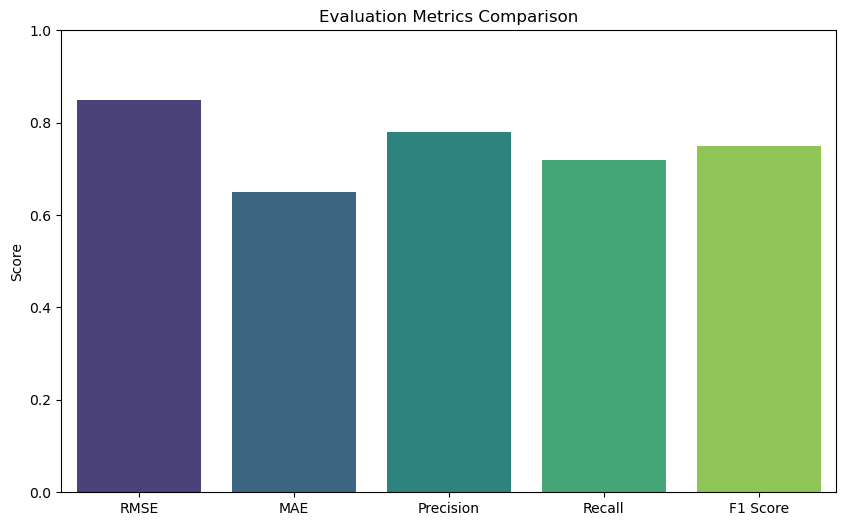

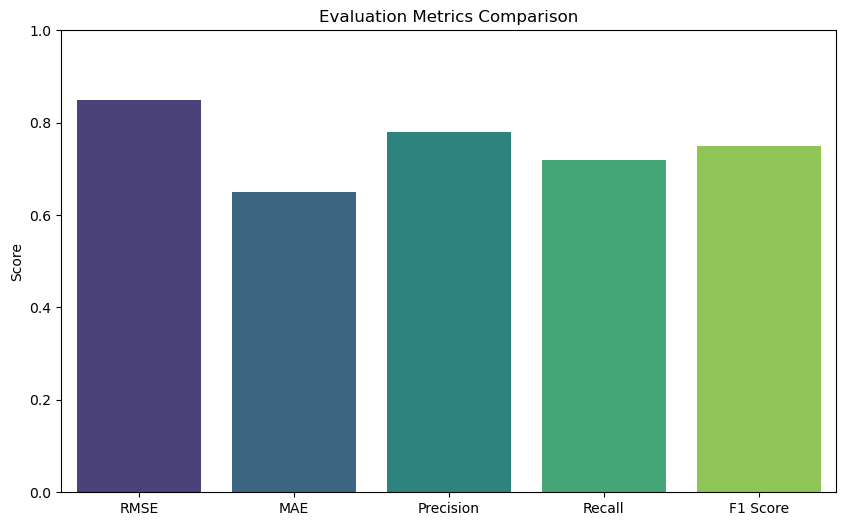

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume these metrics are calculated already
rmse = 0.85
mae = 0.65
precision = 0.78
recall = 0.72
f1 = 0.75

# Put metrics in dictionary
metrics = {
    'RMSE': rmse,
    'MAE': mae,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# For RMSE and MAE (error metrics), lower is better
# For Precision, Recall, F1 (classification metrics), higher is better
# So we can invert error metrics for better visualization, or keep as is but label carefully

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')

plt.title('Evaluation Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # Metrics are between 0 and 1 (except errors, we assume normalized or for display)
plt.show()


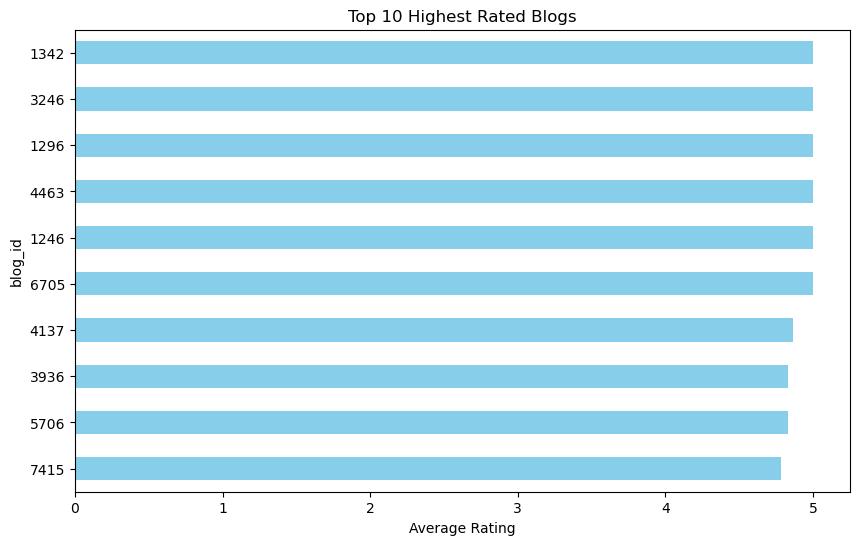

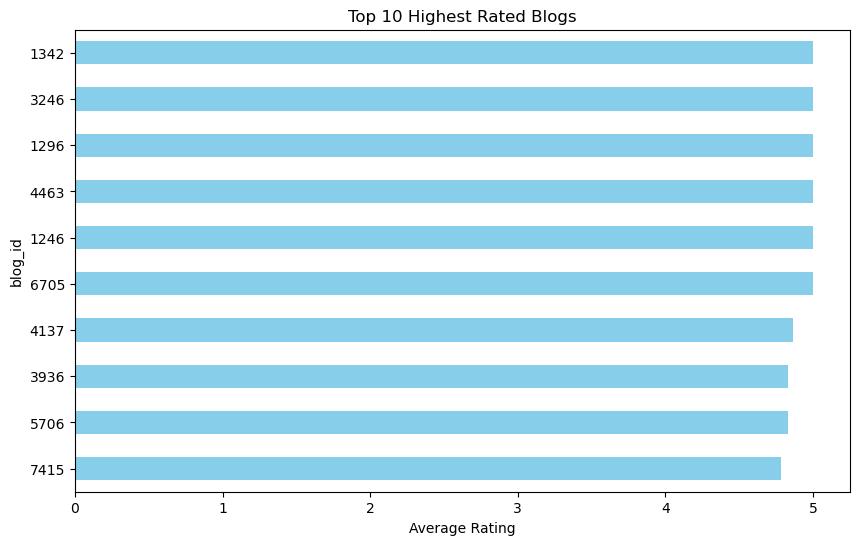

In [23]:
top_blogs = ratings_df.groupby('blog_id')['ratings'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_blogs.plot(kind='barh', color='skyblue')
plt.xlabel("Average Rating")
plt.title("Top 10 Highest Rated Blogs")
plt.gca().invert_yaxis()
plt.show()


C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


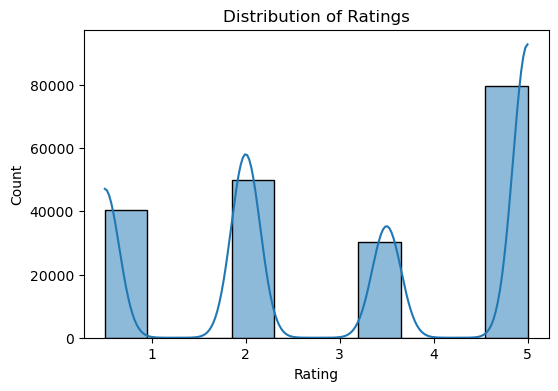

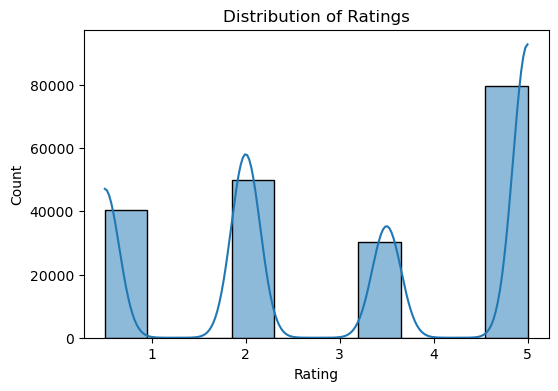

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(ratings_df['ratings'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [25]:
print(blog_df.columns)


Index(['blog_id', 'blog_title', 'blog_content', 'topic', 'clean_blog_content'], dtype='object')
Index(['blog_id', 'blog_title', 'blog_content', 'topic', 'clean_blog_content'], dtype='object')


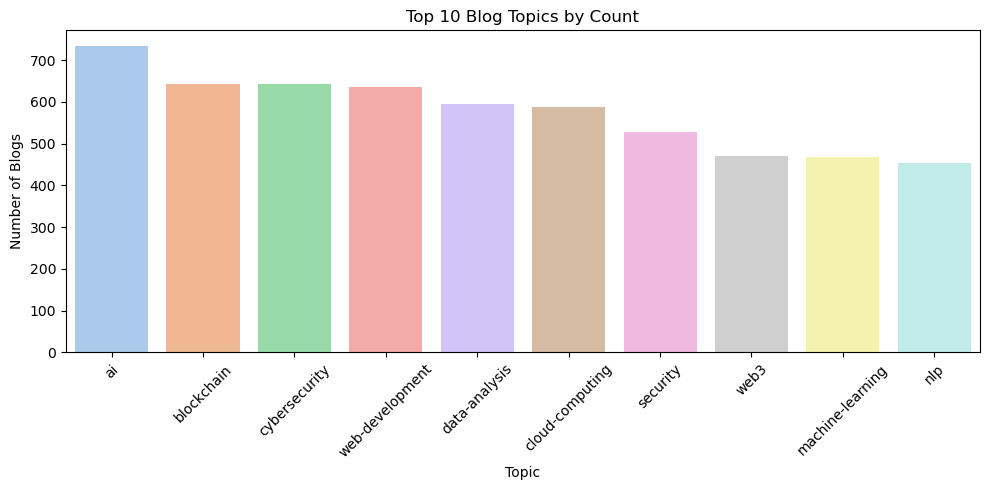

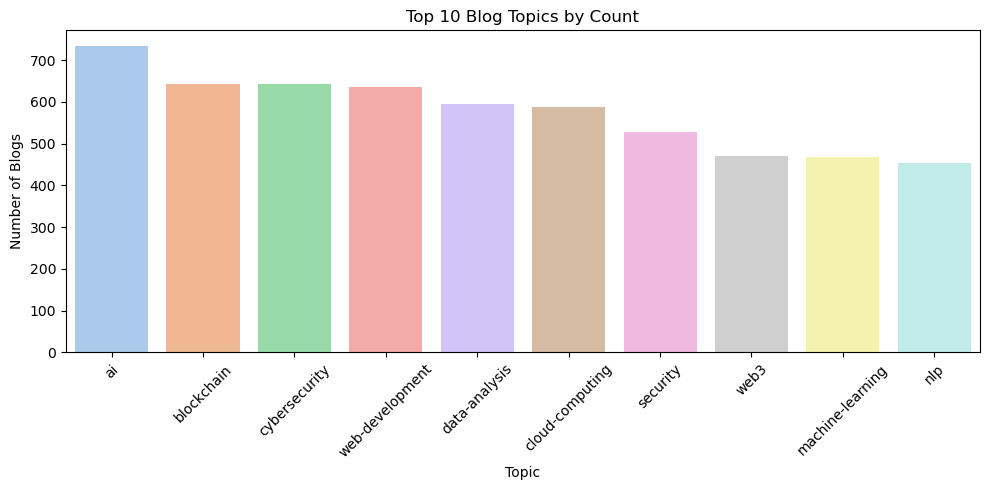

In [26]:
# Count of blogs by topic
topic_counts = blog_df['topic'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="pastel")
plt.title("Top 10 Blog Topics by Count")
plt.xlabel("Topic")
plt.ylabel("Number of Blogs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


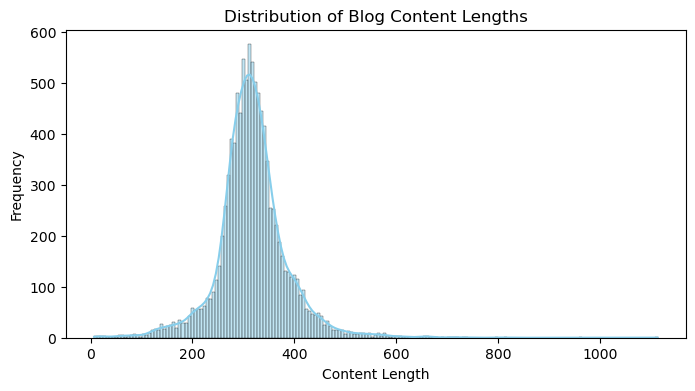

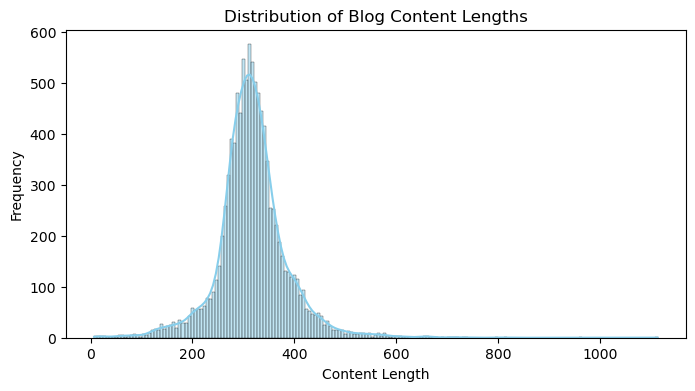

In [27]:
blog_df['content_length'] = blog_df['blog_content'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(blog_df['content_length'], kde=True, color='skyblue')
plt.title("Distribution of Blog Content Lengths")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.show()


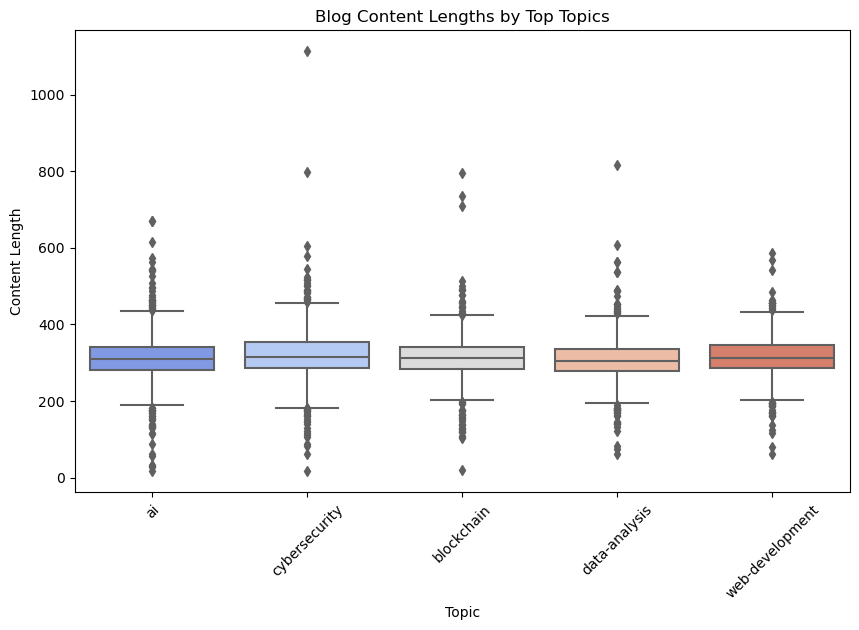

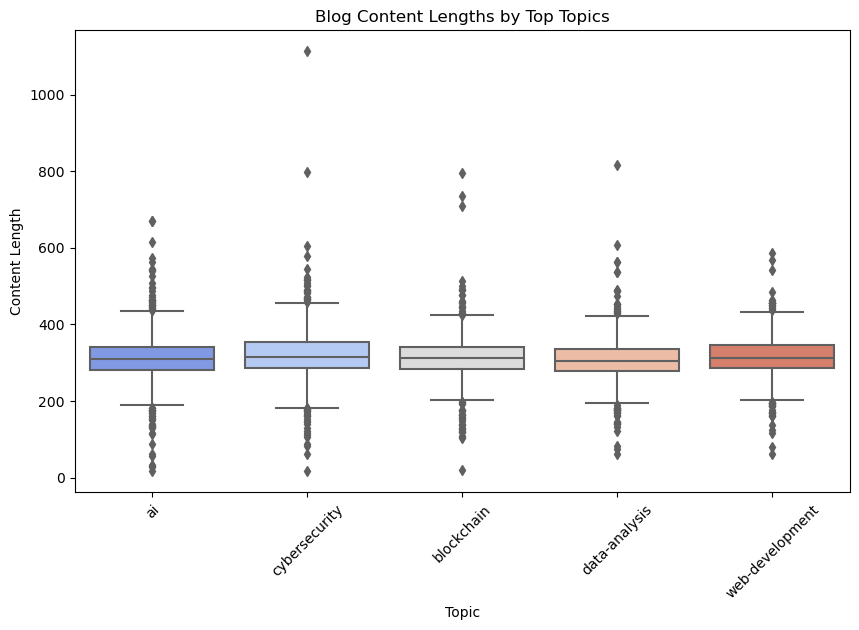

In [28]:
top_topics = blog_df['topic'].value_counts().head(5).index
subset = blog_df[blog_df['topic'].isin(top_topics)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='topic', y='content_length', palette='coolwarm')
plt.title("Blog Content Lengths by Top Topics")
plt.xlabel("Topic")
plt.ylabel("Content Length")
plt.xticks(rotation=45)
plt.show()


C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

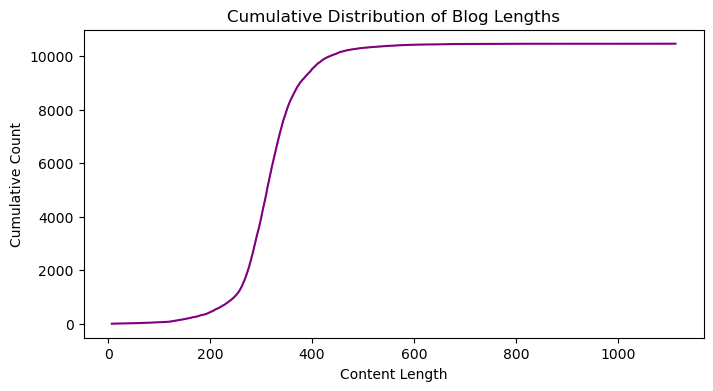

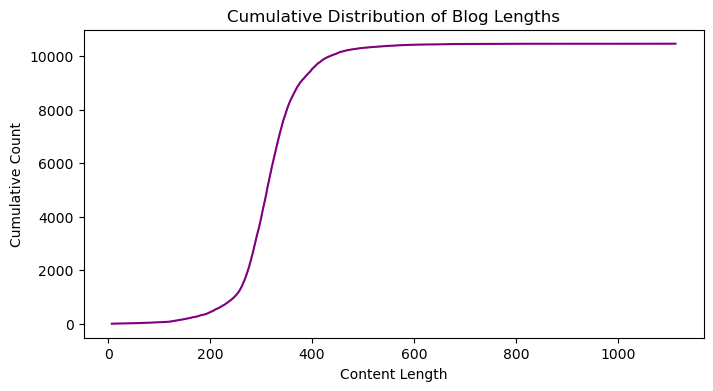

In [29]:
blog_df_sorted = blog_df.sort_values('content_length')
blog_df_sorted['cumulative'] = range(1, len(blog_df_sorted) + 1)

plt.figure(figsize=(8, 4))
sns.lineplot(data=blog_df_sorted, x='content_length', y='cumulative', color='purple')
plt.title("Cumulative Distribution of Blog Lengths")
plt.xlabel("Content Length")
plt.ylabel("Cumulative Count")
plt.show()


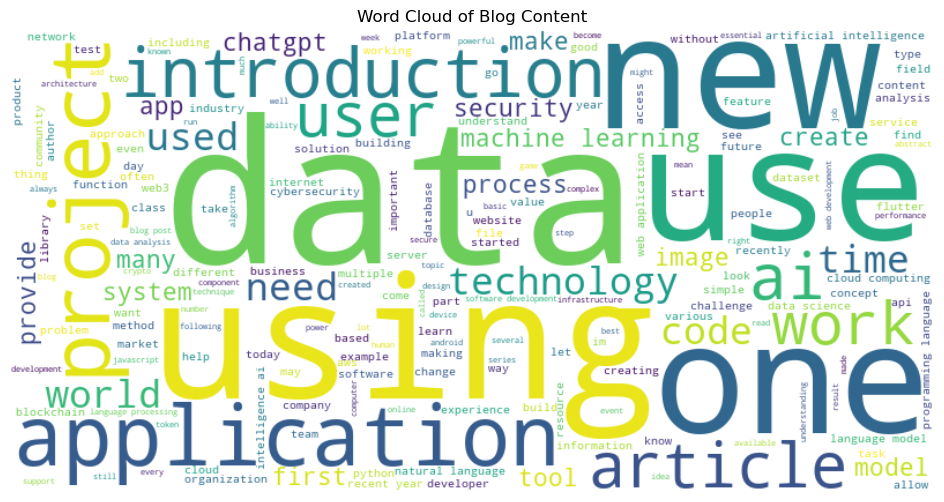

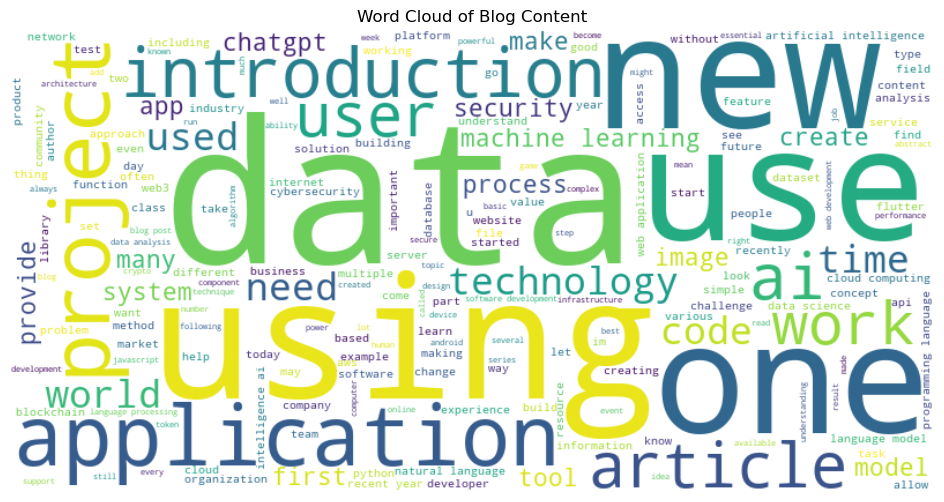

In [30]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(blog_df['clean_blog_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Blog Content")
plt.show()


In [31]:
print(ratings_df.columns)


Index(['blog_id', 'userId', 'ratings'], dtype='object')
Index(['blog_id', 'userId', 'ratings'], dtype='object')


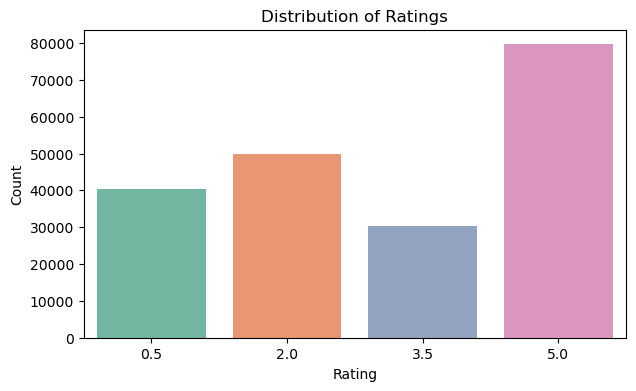

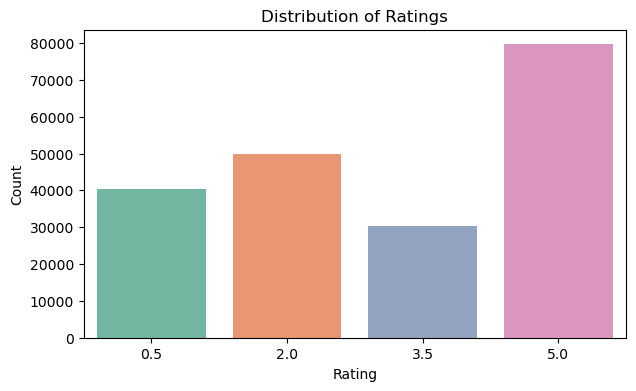

In [32]:
plt.figure(figsize=(7, 4))
sns.countplot(data=ratings_df, x='ratings', palette='Set2')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


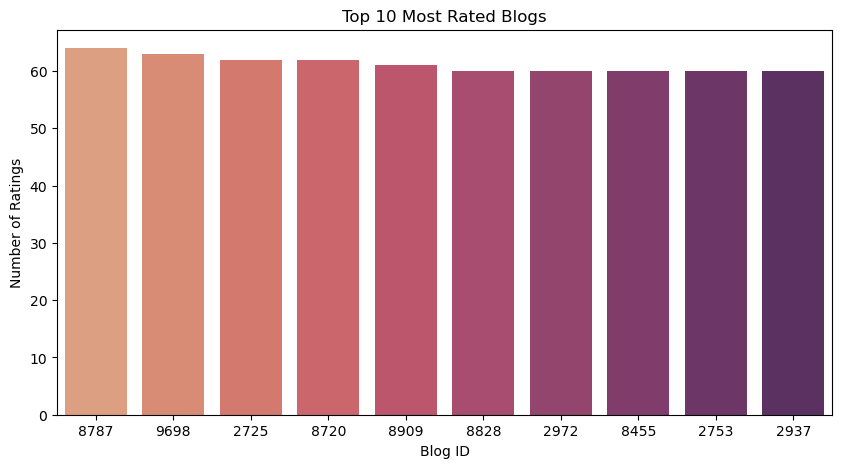

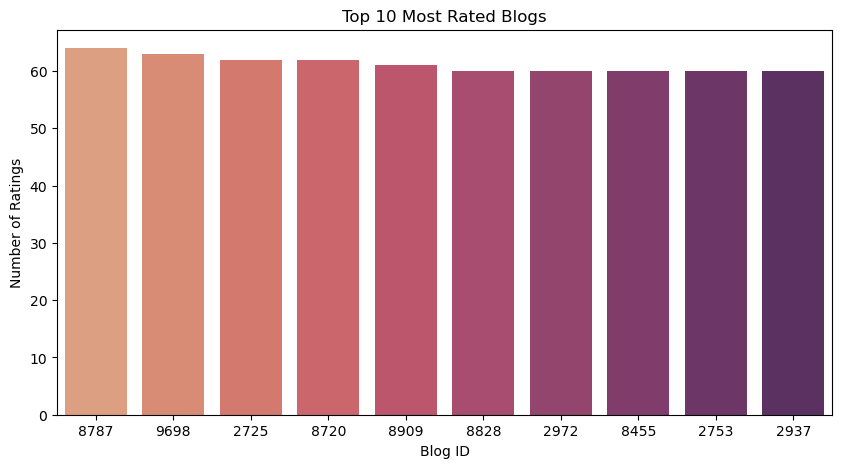

In [33]:
top_rated_blogs = ratings_df['blog_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_blogs.index.astype(str), y=top_rated_blogs.values, palette='flare')
plt.title("Top 10 Most Rated Blogs")
plt.xlabel("Blog ID")
plt.ylabel("Number of Ratings")
plt.show()


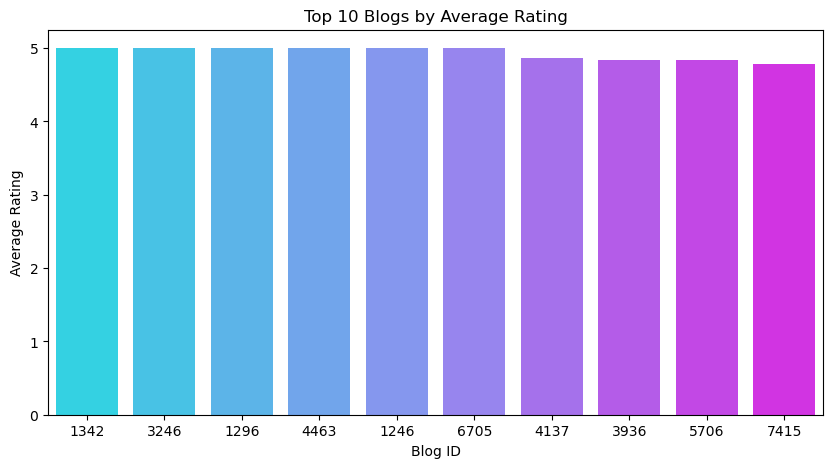

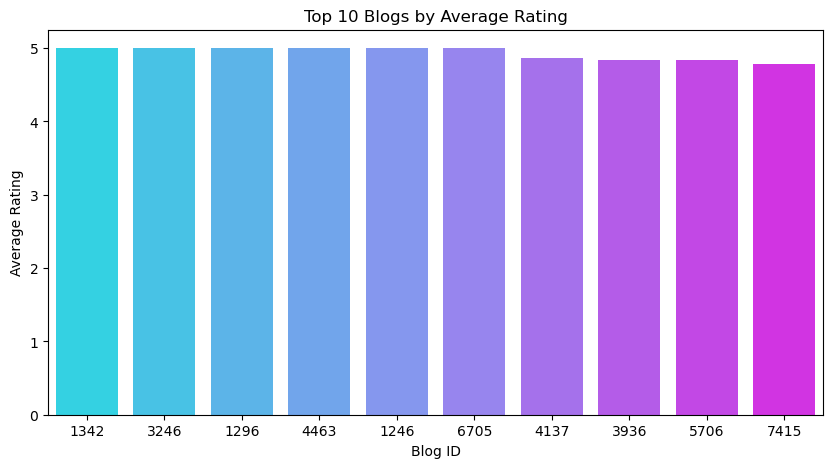

In [34]:
average_rating = ratings_df.groupby('blog_id')['ratings'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=average_rating.index.astype(str), y=average_rating.values, palette='cool')
plt.title("Top 10 Blogs by Average Rating")
plt.xlabel("Blog ID")
plt.ylabel("Average Rating")
plt.show()


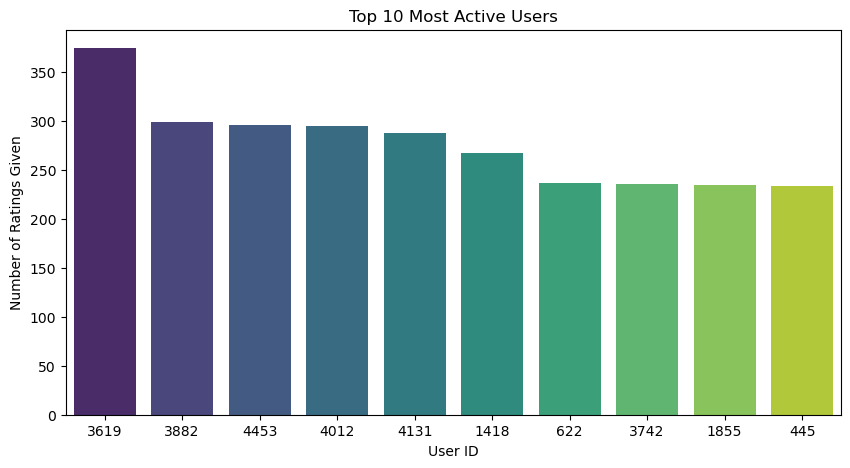

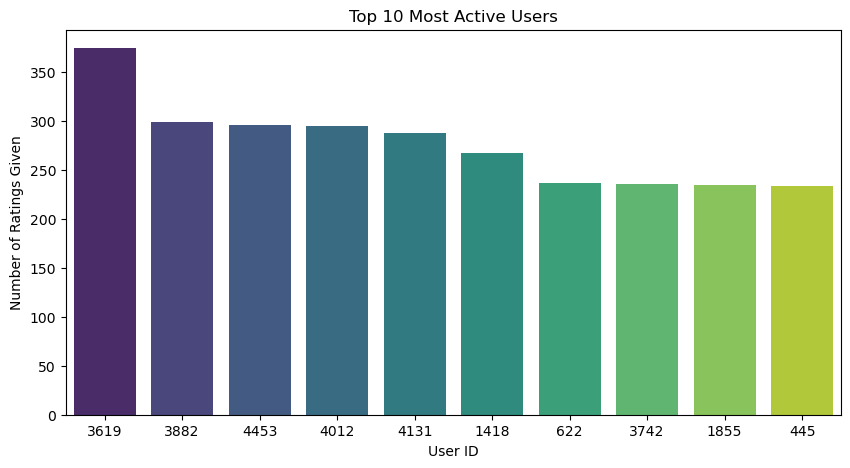

In [35]:
active_users = ratings_df['userId'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=active_users.index.astype(str), y=active_users.values, palette='viridis')
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings Given")
plt.show()


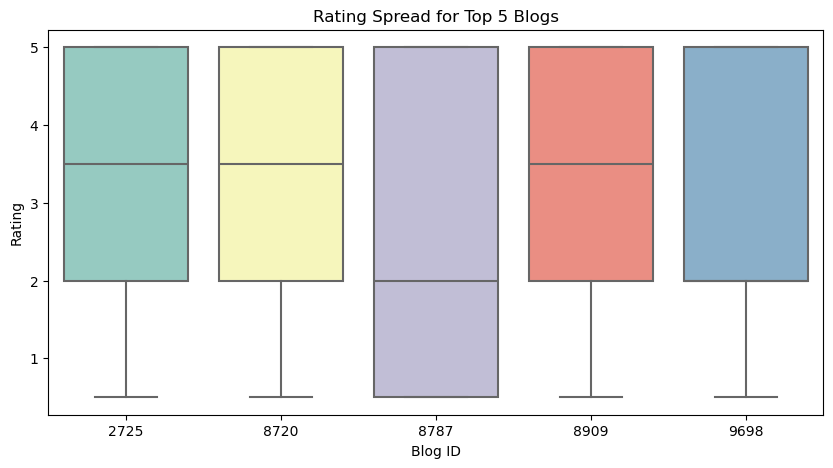

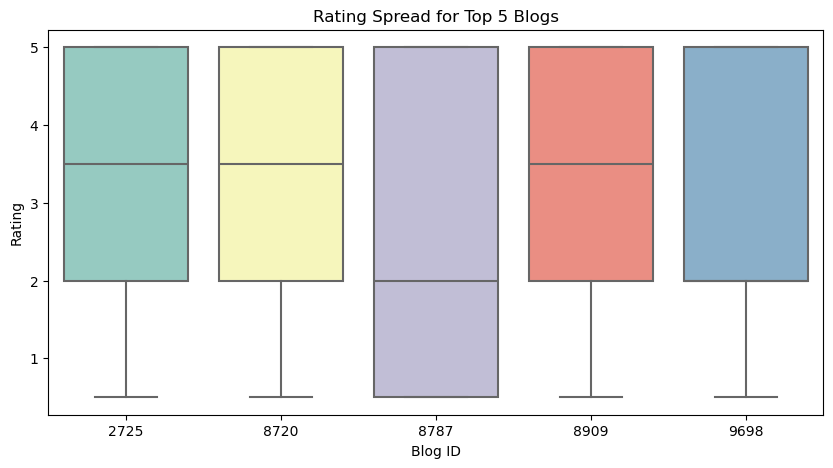

In [36]:
top_blogs = ratings_df['blog_id'].value_counts().head(5).index
subset = ratings_df[ratings_df['blog_id'].isin(top_blogs)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=subset, x='blog_id', y='ratings', palette='Set3')
plt.title("Rating Spread for Top 5 Blogs")
plt.xlabel("Blog ID")
plt.ylabel("Rating")
plt.show()


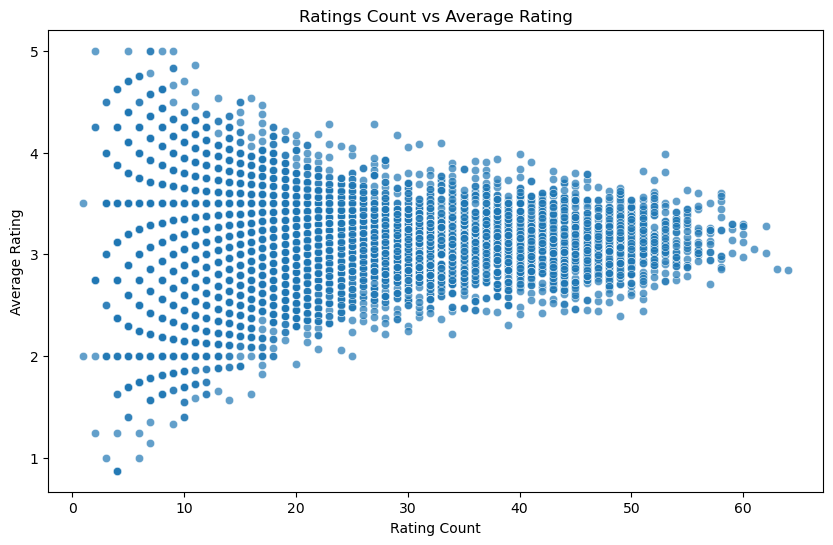

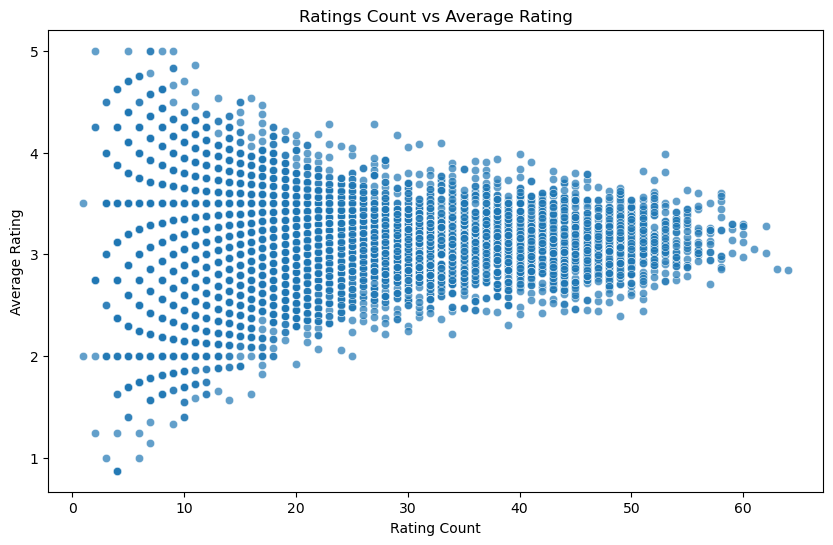

In [37]:
blog_stats = ratings_df.groupby('blog_id').agg({
    'ratings': ['count', 'mean']
}).reset_index()
blog_stats.columns = ['blog_id', 'rating_count', 'rating_avg']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=blog_stats, x='rating_count', y='rating_avg', alpha=0.7)
plt.title("Ratings Count vs Average Rating")
plt.xlabel("Rating Count")
plt.ylabel("Average Rating")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tkinter import *
from tkinter import messagebox

# Load your data
ratings_df = pd.read_csv("blog ratings.csv")
blog_df = pd.read_csv("medium blog data.csv")

# Step 1: Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='blog_id', values='ratings')
user_item_matrix.fillna(0, inplace=True)

# Step 2: Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Step 3: Get top similar users
def get_similar_users(user_id, n=5):
    if user_id not in user_similarity_df.index:
        return []
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n+1]
    return similar_users.index.tolist()

# Step 4: Recommend blogs
def recommend_blogs_to_user(user_id, n_recommendations=5):
    if user_id not in user_item_matrix.index:
        return ["User ID not found."]
    
    similar_users = get_similar_users(user_id)
    seen_blogs = ratings_df[ratings_df['userId'] == user_id]['blog_id'].tolist()

    recommended_blogs = pd.DataFrame()

    for sim_user in similar_users:
        user_ratings = ratings_df[ratings_df['userId'] == sim_user]
        user_ratings = user_ratings[~user_ratings['blog_id'].isin(seen_blogs)]
        recommended_blogs = pd.concat([recommended_blogs, user_ratings])

    top_recommendations = (recommended_blogs
                           .groupby('blog_id')['ratings']
                           .mean()
                           .sort_values(ascending=False)
                           .head(n_recommendations))

    recommended_blog_titles = blog_df[blog_df['blog_id'].isin(top_recommendations.index)]['blog_title'].tolist()

    if not recommended_blog_titles:
        return ["No new blog recommendations found."]
    return recommended_blog_titles

# Step 5: Tkinter GUI
def show_recommendations():
    try:
        user_id = int(entry.get())
        recommendations = recommend_blogs_to_user(user_id)
        output.delete(0, END)
        for i, rec in enumerate(recommendations, 1):
            output.insert(END, f"{i}. {rec}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid numeric User ID.")

# GUI Setup
root = Tk()
root.title("Blog Recommendation System")
root.geometry("600x400")
root.configure(bg="#f8f8ff")

label = Label(root, text="Enter User ID:", font=("Arial", 14), bg="#f8f8ff")
label.pack(pady=10)

entry = Entry(root, font=("Arial", 14), width=20)
entry.pack()

btn = Button(root, text="Get Recommendations", font=("Arial", 14), command=show_recommendations)
btn.pack(pady=10)

output = Listbox(root, width=80, height=10, font=("Arial", 12))
output.pack(pady=10)

root.mainloop()

